In [12]:
import pandas as pd

# products = pd.read_csv('./products.csv')
products = pd.read_csv('./products_join_categories.csv')

products.sample(10)

,Unnamed: 0,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
120357,120357,120357,美军生存手册(国内唯一全译本),"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事
240958,240958,240958,宅妆:家居软装饰,"832,665,72",832,图书音像,665,生活类图书,72.0,家庭/家居
261558,261558,261558,中国法治观念,"832,723,160",832,图书音像,723,人文社科类图书,160.0,法律
8342,8342,8342,didicerf 110025 迪迪童装 女童 夏装 粉色条纹连衣裙 4岁-12岁宝宝,"802,777,293",802,服饰服装,777,童装/童鞋/亲子装,293.0,儿童裙装
19320,19320,19320,声音博动中国(第2辑),"832,723,189",832,图书音像,723,人文社科类图书,189.0,社会科学
406405,406405,406405,造园初学者指南,"832,665,72",832,图书音像,665,生活类图书,72.0,家庭/家居
506320,506320,506320,新日本语能力测试N2词汇背诵手册(附MP3光盘1张),"832,1101,921",832,图书音像,1101,少儿/教育图书,921.0,外语
122720,122720,122720,我辈岂是蓬蒿人:12位艺术巨匠的痴狂人生,"832,519,599",832,图书音像,519,文学艺术,599.0,文学类
59212,59212,59212,幼儿园习惯养成教育(实验教材)(小班)(上下),"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
346564,346564,346564,(2013年)专升本入学考试命题预测试卷:高等数学(1),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试


In [29]:
# def get_merged_csv(flist, **kwargs):
#     return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

# cols = [0,1,2]
# df = get_merged_csv('D:/step/ratings.csv', index_col=None, usecols=cols)

# print(df.head())

chunksize = 500000
col_names =  ['userId', 'productId', 'rating']
final  = pd.DataFrame(columns = col_names)
totalRows = 0
for chunk in pd.read_csv('D:/step/ratings.csv', chunksize=chunksize):
    del chunk['timestamp']
    del chunk['comment']
    del chunk['title']
    final = pd.concat([final,chunk])
    totalRows+=chunk.shape[0]
    print("processing the first " + str(totalRows) + " rows" )
    
print("Origin TotalRow is totalRows " + str(totalRows) )
print( "After process , the totalRow is " + str(final.shape[0]) )
final.head()
final.to_csv('D:/step/ratings_drop.csv', encoding="utf_8_sig")
# ratings = pd.read_csv( 'D:/step/ratings.csv' , usecols=cols )
# print(ratings.shape[0])
    

MemoryError: 

In [50]:
categories = pd.read_csv( './categories.csv')

print('Category types：%d' % categories.shape[0])
categories.set_index('catId', inplace=True)

Category types：1175


In [11]:
# for idr, row in products.iterrows():
#     split = row['catIds'].split(",") 
#     for i in range(len(split)):
#         products.at[idr, 'cat'+str(i+1)] = split[i]
#         products.at[idr, 'cat'+str(i+1)+'_name'] = categories.loc[int(split[i])]['category']

# products.to_csv('./products_join_categories.csv', encoding="utf_8_sig")
# products.head(10)

,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
0,0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
1,1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
2,2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739,工具书
3,3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923,进口图书
4,4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
5,5,Caps for Sale Book and CD,"832,476,923",832,图书音像,476,其它图书,923,进口图书
6,6,The Gulag Archipelago Volume 3: An Experiment ...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
7,7,150 Best Bathroom Ideas,"832,476,923",832,图书音像,476,其它图书,923,进口图书
8,8,The Forgotten Warrior,"832,476,923",832,图书音像,476,其它图书,923,进口图书
9,9,Free Fall,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿


In [14]:
print("Product count: %d" % products.shape[0])
print("Null in cat1: %d" % products['cat1'].isnull().sum())
print("Null in cat2: %d" % products['cat2'].isnull().sum())
print("Null in cat3: %d" % products['cat3'].isnull().sum())

Product count: 525619
Null in cat1: 0
Null in cat2: 0
Null in cat3: 1202


Text(0.5, 0, 'cat1')

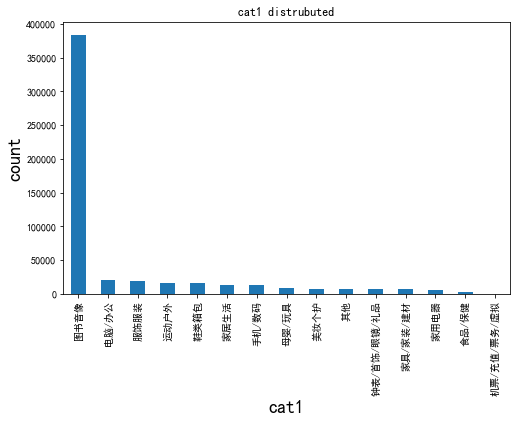

In [57]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

d = {'cat1':products['cat1_name'].value_counts().index, 'count': products['cat1'].value_counts()}
df_cat1 = pd.DataFrame(data=d).reset_index(drop=True)

df_cat1.plot(x='cat1', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat1 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat1', fontsize=18)

Text(0.5, 0, 'cat2')

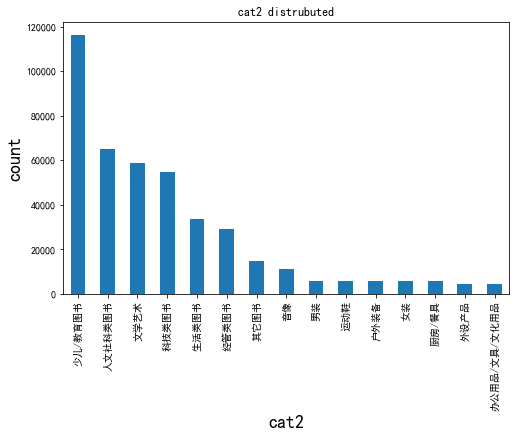

In [21]:
d = {'cat2':products['cat2_name'].value_counts().index, 'count': products['cat2'].value_counts()}
df_cat2 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat2 = df_cat2.sort_values(by="count",ascending= False).head(15)

df_cat2.plot(x='cat2', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat2 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat2', fontsize=18)

Text(0.5, 0, 'cat3')

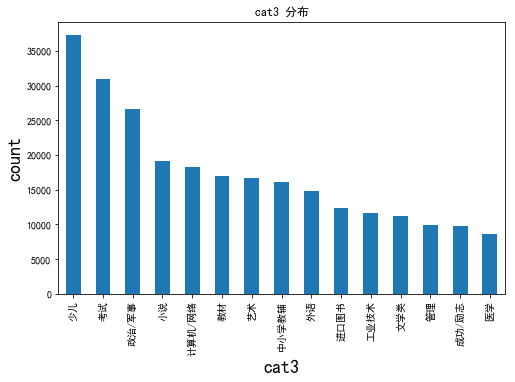

In [22]:
d = {'cat3':products['cat3_name'].value_counts().index, 'count': products['cat3'].value_counts()}
df_cat3 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat3 = df_cat3.sort_values(by="count",ascending= False).head(15)

df_cat3.plot(x='cat3', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat3 分布")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat3', fontsize=18)

In [58]:
# https://github.com/goto456/stopwords

products[products.cat1_name!='图书音像']

,Unnamed: 0,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
233,233,233,Old Macdonald's Barn,"911,180,636",911,母婴/玩具,180,早教/益智,636.0,早教/智能玩具
272,272,272,THE NORTH FACE 乐斯菲斯 男式 冲锋衣 A2YR,"1111,651,245",1111,运动户外,651,户外服装,245.0,冲锋衣
273,273,273,TISSOT 天梭T-Classic经典系列石英蓝宝石女表 T52.2.281.13,"486,487,706",486,钟表/首饰/眼镜/礼品,487,钟表,706.0,手表
274,274,274,SteelSeries 赛睿 西伯利亚后挂式 耳机,"1057,439,992",1057,电脑/办公,439,外设产品,992.0,耳机/耳麦
276,276,276,BOSCH博世牌 冲击钻GSB16GSB 16,"571,1037,859",571,家具/家装/建材,1037,施工用具,859.0,拆除用具
277,277,277,BOSCH博世冲击石工钻头10x80x120(2608590081),"571,1155,695",571,家具/家装/建材,1155,五金/工具,695.0,刃具
278,278,278,漫步者音箱R501T04,"1057,439,1064",1057,电脑/办公,439,外设产品,1064.0,电脑音箱
279,279,279,HP 标准墨盒 853(C8767ZZ)(适用于:Hp Deskjet6548/6848/9...,"1057,1094,500",1057,电脑/办公,1094,办公设备/耗材,500.0,墨盒/硒鼓/墨粉/色带
280,280,280,CASIO 卡西欧 指针Child系列电池防水女表 LQ-139BMV-1B,"486,487,706",486,钟表/首饰/眼镜/礼品,487,钟表,706.0,手表
281,281,281,CASIO 卡西欧 指针Standard系列男表 MTP-1247D-2AVDF,"486,487,706",486,钟表/首饰/眼镜/礼品,487,钟表,706.0,手表
